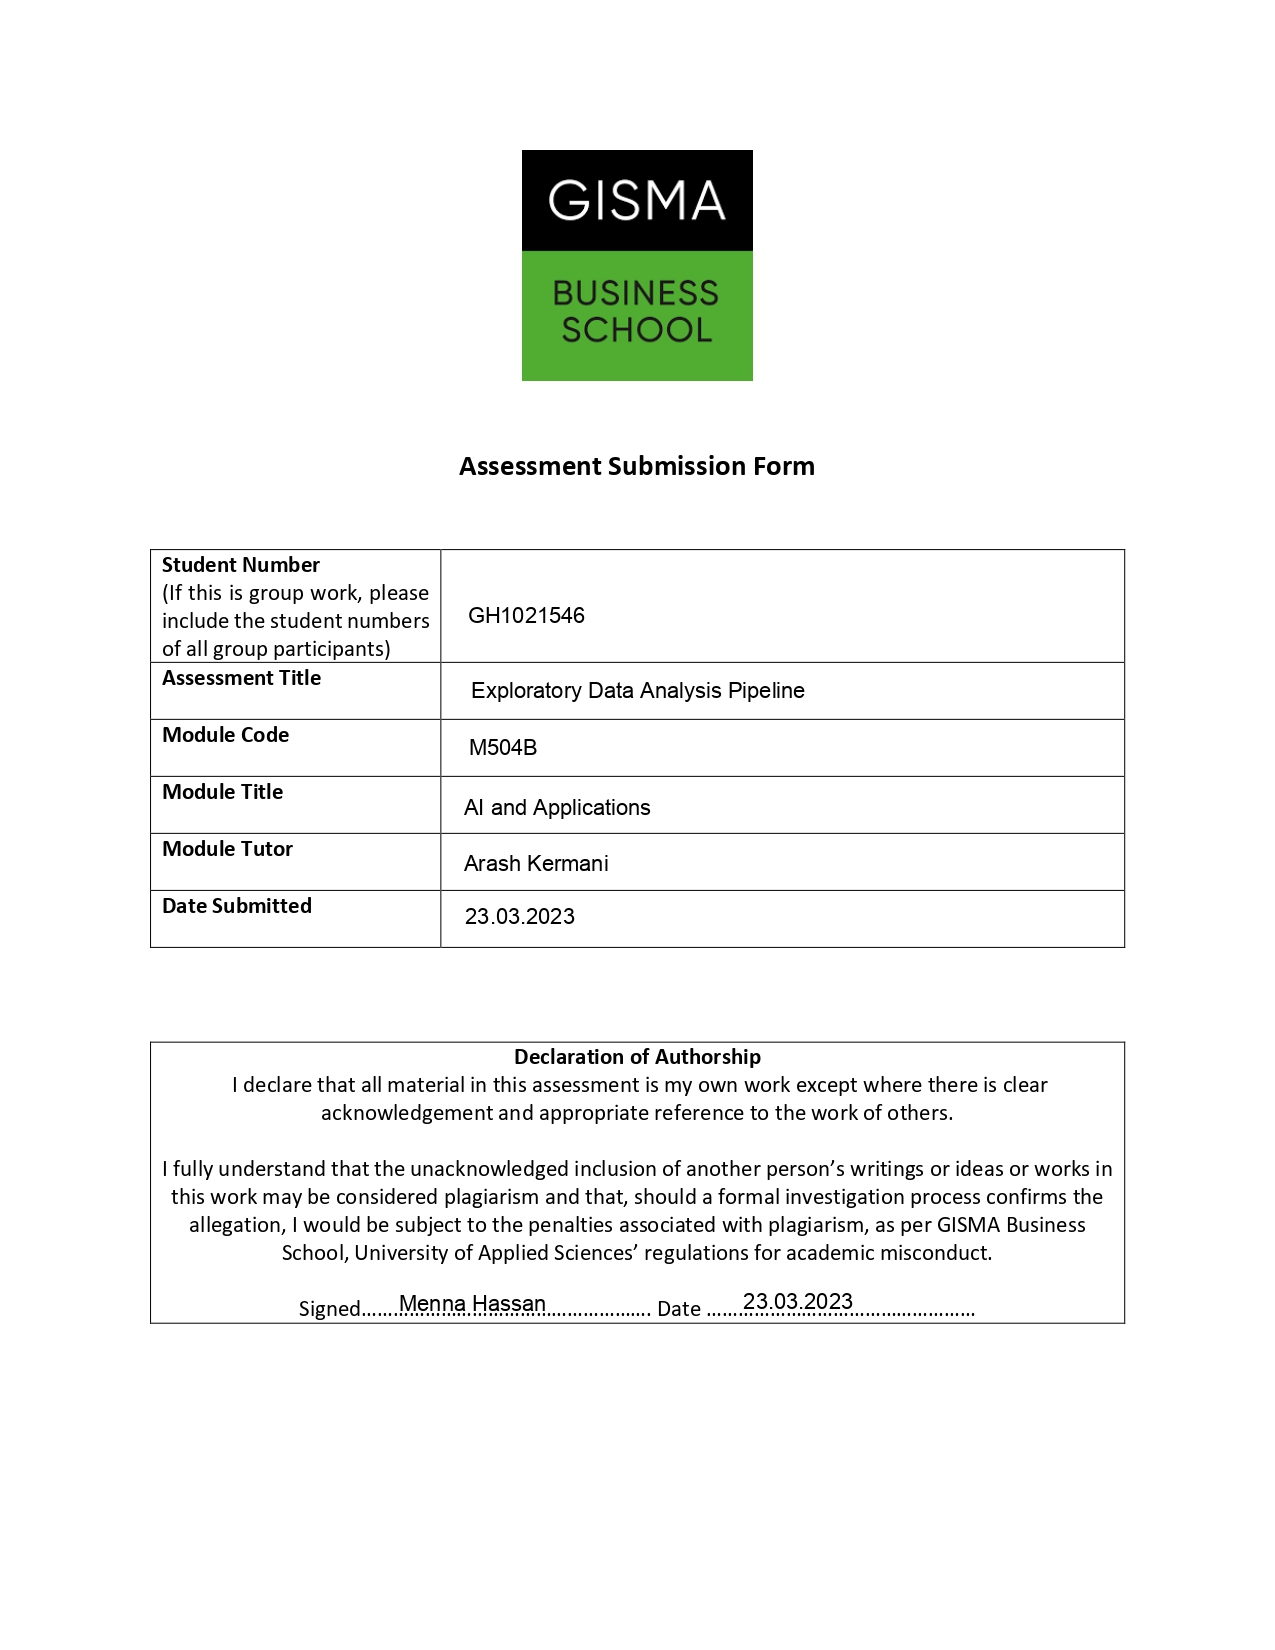

# Introduction

The following notebook contains analysis on the Netflix movies/shows dataset. The analysis contains exploring the dataset and answering some business questions that can benefit the company.

Note: that tv shows in the dataset are displayed in form of episodes.

The Questions discussed in this notebook are:


   - Top 10 rated Movies/Shows.
   

   - Number of Movies/Shows released each year. 
        - Which year has the highest number of releases?
        - Which year has the lowest number of releases?


   - Genre with the highest rating.
   
   
   -  Content-based recommendation:
       - Recommend 10 similar movies to a given movie according to Description.
       - Recommend 10 similar movies to a given movie according to Genre.
       - Recommend 10 similar movies to a given movie according to the Cast of the Movie/Show.

# Import Libraries

The  follwoing libraries and packages are imported to be used for data loading and analysis:

In [1]:
#Importing libraries and packages
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

--------------------------------------------------------------------------------------------------------------------------------

# Load Dataset

Loaded the `netflix-movies` dataset using Pandas. It can be found at https://www.kaggle.com/datasets/narayan63/netflix-popular-movies-dataset

In [2]:
#Loading the dataset using Pandas
df_og = pd.read_csv("C:\\Users\\menna\\Desktop\\AI and Apps\\n_movies.csv")

#Displaying the first 5 records of the dataset
df_og.head()

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"


The Dataset consists of records of Movies/Shows that are currently in the Netflix Library and their features which we will take a look at in the Data Exploration.

--------------------------------------------------------------------------------------------------------------------------------

# Data Exploration

The following section is exploring the data in order to determine which data preprocessing techniques will be needed to clean and prepare the data for analysis.

The following steps were implemented:
- Displaying the dataframe and it's shape to understand: 
    - The dimensions of the table
    - How many records(movies/shows)?
    - How many features?
    - What are the features and their meaning?
- Diplaying info of the dataset to understand the data type of each feature and the number of null values in each feature in order to handle missing values in data preprocesiing step.
- Checking for duplicates to make sure that the analysis will be performed correctly, if there was duplicates they would be removed to avoid bias.
- Checking the number of records (9957) before conducting any preprocessing in order to be able to check how many records were removed.

In [3]:
#Displaying original dataset and its dimensions
df_og

,title,year,certificate,duration,genre,rating,description,stars,votes
0,Cobra Kai,(2018– ),TV-14,30 min,"Action, Comedy, Drama",8.5,Decades after their 1984 All Valley Karate Tou...,"['Ralph Macchio, ', 'William Zabka, ', 'Courtn...","177,031"
1,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,885"
2,Better Call Saul,(2015–2022),TV-MA,46 min,"Crime, Drama",8.9,The trials and tribulations of criminal lawyer...,"['Bob Odenkirk, ', 'Rhea Seehorn, ', 'Jonathan...","501,384"
3,Devil in Ohio,(2022),TV-MA,356 min,"Drama, Horror, Mystery",5.9,When a psychiatrist shelters a mysterious cult...,"['Emily Deschanel, ', 'Sam Jaeger, ', 'Gerardo...","9,773"
4,Cyberpunk: Edgerunners,(2022– ),TV-MA,24 min,"Animation, Action, Adventure",8.6,A Street Kid trying to survive in a technology...,"['Zach Aguilar, ', 'Kenichiro Ohashi, ', 'Emi ...","15,413"
...,...,...,...,...,...,...,...,...,...
9952,The Imperfects,(2022– ),TV-MA,45 min,"Action, Adventure, Drama",6.3,After an experimental gene therapy turns them ...,"['Morgan Taylor Campbell, ', 'Italia Ricci, ',...","3,130"
9953,The Walking Dead,(2010–2022),TV-MA,44 min,"Drama, Horror, Thriller",8.1,Sheriff Deputy Rick Grimes wakes up from a com...,"['Andrew Lincoln, ', 'Norman Reedus, ', 'Melis...","970,067"
9954,The Crown,(2016– ),TV-MA,58 min,"Biography, Drama, History",8.7,Follows the political rivalries and romance of...,"['Claire Foy, ', 'Olivia Colman, ', 'Imelda St...","199,898"
9955,Supernatural,(2005–2020),TV-14,44 min,"Drama, Fantasy, Horror",8.4,Two brothers follow their father's footsteps a...,"['Jared Padalecki, ', 'Jensen Ackles, ', 'Jim ...","439,601"


The dataset contains 9957 movies/shows and 9 features, the features are:

- `title`:  The name of the Movie or Show.
- `year`:  The year in which the Movie/Show was released and the year in which the last episode was released.
- `certificate`:  Rating of Movies/Shows based on suitability for audience (Ex: TV-14 = For audience older then 14).
- `duration`:  Duration of the movie in Minutes.
- `genre`:  The genre or the mix of genres of the Movie/Show.
- `rating`:  The IMDB rating of the Movie/Show (0 to 10).
- `description`:  The Movie/Show synopsis.
- `stars`:  The cast of the Movie/Show.
- `votes`:  The number of votes received for the movie `rating`.

In [4]:
#Printing Information on the dataset
df_og.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9957 entries, 0 to 9956
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        9957 non-null   object 
 1   year         9430 non-null   object 
 2   certificate  6504 non-null   object 
 3   duration     7921 non-null   object 
 4   genre        9884 non-null   object 
 5   rating       8784 non-null   float64
 6   description  9957 non-null   object 
 7   stars        9957 non-null   object 
 8   votes        8784 non-null   object 
dtypes: float64(1), object(8)
memory usage: 700.2+ KB


Summary of Dataset Info:

- All features are of type Object except for the `rating` which is of type Float64
- Features `year`,`certificate`,`duration`,`genre`,`rating` and `votes` all have null values which need to be handled in the Data Preprocessing step

In [5]:
#Checking if there are duplicates
print(f"Number of duplicated rows is {sum(df_og.duplicated() == True)}")

Number of duplicated rows is 0


In [6]:
print(f"Number of rows before cleansing = {len(df_og)}")

Number of rows before cleansing = 9957


--------------------------------------------------------------------------------------------------------------------------------

# Data Preprocessing

The following section is cleaning and preparing the data for analysis, the following steps were implemented:
- Created a non-pointer copy of the dataset to conduct preprocessing on so I can preserve the original dataset's shape and form.
- Dropped all null values as a way of handling missing values to avoid bias or inaccuracy in the data analysis.
- Sorted values into descending order of the rating to display the dataset from highest to lowest rated.
- Reseted the index as it was messed up afted dropping the rows with null values.
- Checked number of rows after cleansing which is now 5754 rows, which means  4203 records where droped during preprocessing. 
- Renamed the column `stars` to `cast` as it makes more sense to the context of the dataset and is more understandable.
- The feature `year` was in the form of range as for TV Shows it displayed the release year of thevshow and the last year it was aired (ex:(2017-2022)) so the following steps were applied in order to be able to apply the analysis as we also only need the release year of the records for this analysis:
    - Removed special characters such as "-,),(" in order to be able to extract the release year (4 numbers).
    - Created a new column named `release_year` so we can set it with the extracted number.
    - Set the `release_year` of each record with the first four characters from the `year` column which is the release year.
    - Transformed the type of the `release_year` from Object to Integar after finalizing preprocessing it.
    - Dropped column `year` as it's no longer needed.
- Dropped features that won't be needed for this analysis and reorganized columns to make the data displayed simpler and easier to track.
- Finally displayed the final table that will be used for the analysis.

In [7]:
#Creating a non-pointer copy of the dataset
df=df_og.copy()

In [8]:
#Drop all null values
df=df.dropna()

#Sorting records in a descending of their rating to view the highest to lowest rated
df=df.sort_values("rating",ascending=False)

#Resetting Index
df= df.reset_index(drop=True)

In [9]:
#Displaying dataframe after the initial preprocessing
df

,title,year,certificate,duration,genre,rating,description,stars,votes
0,BoJack Horseman,(2014–2020),TV-MA,26 min,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...","16,066"
1,Avatar: The Last Airbender,(2005–2008),TV-Y7,25 min,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...","5,221"
2,Dexter,(2006–2013),TV-MA,56 min,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...","10,604"
3,JoJo's Bizarre Adventure,(2012– ),TV-MA,25 min,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...","1,442"
4,Stranger Things,(2016– ),TV-14,98 min,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...","36,276"
...,...,...,...,...,...,...,...,...,...
5749,The Hype House,(2022– ),TV-MA,36 min,Reality-TV,2.1,Get an inside look at social media's least tal...,"['Larray, ', 'Alex Warren, ', 'Kouvr Annon, ',...","2,955"
5750,Thomas & Friends: All Engines Go,(2021– ),TV-Y,30 min,"Animation, Short, Adventure",2.1,"All aboard, everyone. It's all engines go as T...","['Ava Ro, ', 'Charlie Zeltzer, ', 'Glee Dango,...",604
5751,Way of the Vampire,(2005),R,82 min,"Action, Horror, Thriller",2.0,"After defeating Dracula, Van Helsing is grante...","['Sarah Nean Bruce, ', 'Eduardo Durão', '| ', ...","1,649"
5752,Hajwala: The Missing Engine,(2016),PG-13,96 min,"Action, Adventure, Crime",2.0,Khalid and Kehailan are two team leaders who a...,"['Ali Bin Matar, ', 'Ibrahim Bin Mohamed, ', '...",261


In [11]:
print(f"Number of rows after cleansing = {len(df)}")

Number of rows after cleansing = 5754


Because of high number of Null values in the dataset, 4203 records where droped. As an improvement, the numerical null values could be replaced with the average of the other values, or use a regression. 

In [12]:
#Renaming the column "stars" to "cast" as it's more suitable
df.rename(columns = {'stars':'cast'}, inplace = True) #Change the stars column name to cast

The `year` feature is in the format of a range of release year to last date of airing, however for this analysis only the release year will be needed so preprocessing will be applied to extract the release year. 

In [13]:
#Removing special characters in column year
df['year'] = df['year'].str.replace(r'\D+',"", regex=True)

In [14]:
#Creating a new column named "release_year" and intializing it with null values
df['release_year'] = np.nan

#Setting the release_year of each record with the first four characters from the year column which is the release year
df['release_year'] = df['year'].str[:4]

#Typecasting "release_year" from Object to Integar
df['release_year'].astype(int)

#The column year will be dropped as it useless after extracting the release year from it
df=df.drop(['year'], axis=1)

Dataframe after adding the column `release_year`, removing column `year` and renaming the column `stars` to `cast`

In this analysis only the following features will be used:

- `title`
- `genre`
- `rating`
- `description`
- `cast`
- `release_year`

As a result the other features (`certificate`,`duration` and `votes`) will be dropped so the dataframe is simpler and easier to track.

In [16]:
#Dropping features that won't be needed for this analysis
df.drop(['duration','certificate','votes'], axis=1, inplace=True)
df

,title,genre,rating,description,cast,release_year
0,BoJack Horseman,"Animation, Comedy, Drama",9.9,BoJack reconnects with faces from his past.,"['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",2014
1,Avatar: The Last Airbender,"Animation, Action, Adventure",9.6,The heroes work together to stop Azula's destr...,"['Michael Dante DiMartino', '| ', ' Stars:'...",2005
2,Dexter,"Crime, Drama, Mystery",9.6,"In the Season One finale, Dexter follows the c...","['Michael Cuesta', '| ', ' Stars:', 'Michae...",2006
3,JoJo's Bizarre Adventure,"Animation, Action, Adventure",9.6,In the aftermath of the battle between Risotto...,"['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...",2012
4,Stranger Things,"Drama, Fantasy, Horror",9.6,"As Hopper braces to battle a monster, Dustin d...","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...",2016
...,...,...,...,...,...,...
5749,The Hype House,Reality-TV,2.1,Get an inside look at social media's least tal...,"['Larray, ', 'Alex Warren, ', 'Kouvr Annon, ',...",2022
5750,Thomas & Friends: All Engines Go,"Animation, Short, Adventure",2.1,"All aboard, everyone. It's all engines go as T...","['Ava Ro, ', 'Charlie Zeltzer, ', 'Glee Dango,...",2021
5751,Way of the Vampire,"Action, Horror, Thriller",2.0,"After defeating Dracula, Van Helsing is grante...","['Sarah Nean Bruce, ', 'Eduardo Durão', '| ', ...",2005
5752,Hajwala: The Missing Engine,"Action, Adventure, Crime",2.0,Khalid and Kehailan are two team leaders who a...,"['Ali Bin Matar, ', 'Ibrahim Bin Mohamed, ', '...",2016


In [20]:
#Reorganizing columns to make more sense to context
cols = list(df.columns.values) #creating a list of columns names
cols
df=df[['title', 'release_year', 'description','genre', 'cast','rating' ]] #Reordering the columns

The final dataset after applying data preprocessing:

In [21]:
df

,title,release_year,description,genre,cast,rating
0,BoJack Horseman,2014,BoJack reconnects with faces from his past.,"Animation, Comedy, Drama","['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",9.9
1,Avatar: The Last Airbender,2005,The heroes work together to stop Azula's destr...,"Animation, Action, Adventure","['Michael Dante DiMartino', '| ', ' Stars:'...",9.6
2,Dexter,2006,"In the Season One finale, Dexter follows the c...","Crime, Drama, Mystery","['Michael Cuesta', '| ', ' Stars:', 'Michae...",9.6
3,JoJo's Bizarre Adventure,2012,In the aftermath of the battle between Risotto...,"Animation, Action, Adventure","['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...",9.6
4,Stranger Things,2016,"As Hopper braces to battle a monster, Dustin d...","Drama, Fantasy, Horror","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...",9.6
...,...,...,...,...,...,...
5749,The Hype House,2022,Get an inside look at social media's least tal...,Reality-TV,"['Larray, ', 'Alex Warren, ', 'Kouvr Annon, ',...",2.1
5750,Thomas & Friends: All Engines Go,2021,"All aboard, everyone. It's all engines go as T...","Animation, Short, Adventure","['Ava Ro, ', 'Charlie Zeltzer, ', 'Glee Dango,...",2.1
5751,Way of the Vampire,2005,"After defeating Dracula, Van Helsing is grante...","Action, Horror, Thriller","['Sarah Nean Bruce, ', 'Eduardo Durão', '| ', ...",2.0
5752,Hajwala: The Missing Engine,2016,Khalid and Kehailan are two team leaders who a...,"Action, Adventure, Crime","['Ali Bin Matar, ', 'Ibrahim Bin Mohamed, ', '...",2.0


The final dataset now conists of **5754** Movies/Shows and **6** features, the features are:

- `title`:  The name of the Movie or Show.
- `release_year`:  The year in which the Movie/Show was released.
- `description`:  The Movie/Show synopsis.
- `genre`:  The genre or the mix of genres of the Movie/Show.
- `cast`:  The cast of the Movie/Show.
- `rating`:  The IMDB rating of the Movie/Show (0 to 10).

# Top 10 Highest Rated Movies/Shows

For this question I want to check the 10 highest rated movies/shows (records), so I diplayed first 10 records of the table after making sure it's sorted descendingly according to the rating

In [24]:
#Creating a variable that contains a copy of the top 10 sorted records in descending order of their rating
top_10_rated = df.sort_values("rating",ascending=False).head(10).copy()

#Displying the Top 10 rated Movies/Shows and their features
print("The Top 10 Rated Movies are:")
top_10_rated

The Top 10 Rated Movies are:


,title,release_year,description,genre,cast,rating
0,BoJack Horseman,2014,BoJack reconnects with faces from his past.,"Animation, Comedy, Drama","['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",9.9
2,Dexter,2006,"In the Season One finale, Dexter follows the c...","Crime, Drama, Mystery","['Michael Cuesta', '| ', ' Stars:', 'Michae...",9.6
3,JoJo's Bizarre Adventure,2012,In the aftermath of the battle between Risotto...,"Animation, Action, Adventure","['Shinshû Fuji, ', 'Kellen Goff, ', 'Katsuyuki...",9.6
4,Stranger Things,2016,"As Hopper braces to battle a monster, Dustin d...","Drama, Fantasy, Horror","['Matt Duffer, ', 'Ross Duffer', '| ', ' St...",9.6
5,Avatar: The Last Airbender,2005,As the Fire Nation continues its assault on th...,"Animation, Action, Adventure","['Dave Filoni', '| ', ' Stars:', 'Zach Tyle...",9.6
1,Avatar: The Last Airbender,2005,The heroes work together to stop Azula's destr...,"Animation, Action, Adventure","['Michael Dante DiMartino', '| ', ' Stars:'...",9.6
6,Dark,2017,"Armed with a plan to prevent the apocalypse, J...","Crime, Drama, Mystery","['Baran bo Odar', '| ', ' Stars:', 'Louis H...",9.5
7,Avatar: The Last Airbender,2005,Both Aang and Zuko must learn the history of h...,"Animation, Action, Adventure","['Ethan Spaulding', '| ', ' Stars:', 'Zach ...",9.5
8,Breaking Bad,2008,A high school chemistry teacher diagnosed with...,"Crime, Drama, Thriller","['Bryan Cranston, ', 'Aaron Paul, ', 'Anna Gun...",9.5
9,Anne with an E,2017,Anne steps into the next chapter of her life.,"Drama, Family","['Amanda Tapping', '| ', ' Stars:', 'Amybet...",9.5


Displaying only the names of the Top 10 Movies/Shows

In [51]:
top_10_rated["title"]

0               BoJack Horseman
2                        Dexter
3      JoJo's Bizarre Adventure
4               Stranger Things
5    Avatar: The Last Airbender
1    Avatar: The Last Airbender
6                          Dark
7    Avatar: The Last Airbender
8                  Breaking Bad
9                Anne with an E
Name: title, dtype: object

As seen from the analysis above "Avatar: The Last Airbender" appeared more than once in the top 10 making it one of the highest rated shows as 3 of its episodes are in the Top 10.

-------------------------------------------------------------------------------------------------------------------------

# Number of Movies and Shows released each year

Through this question we can analyse the netflix library's distribution in terms of the movies' release year such as which year's movies are more common in the dataset.

Note: this is the release data of the movie/show itself and not the year on which it was added to the netflix library

The number of movies and shows released each year:

In [27]:
#Creating a variable that contains the number of movies released each year and sorting them ascendingly
releases_per_year = df['release_year'].value_counts().sort_index(ascending=True)
releases_per_year

1932      1
1941      1
1945      3
1946      2
1947      1
       ... 
2018    630
2019    647
2020    700
2021    585
2022    452
Name: release_year, Length: 76, dtype: int64

As seen the number of old movies in the dataset is very small compared to movies produced in the late 2000s

The number of movies released each year in the 2000s:

In [28]:
#Creating a variable that contains the number of movies/shows released each year from 2000 to 2022
releases_per_year_2000s = releases_per_year[53:].sort_index(ascending=True)
releases_per_year_2000s

2000      9
2001     28
2002    101
2003     16
2004     85
2005    135
2006     64
2007     52
2008     47
2009     59
2010     81
2011    110
2012    163
2013    200
2014    253
2015    277
2016    368
2017    475
2018    630
2019    647
2020    700
2021    585
2022    452
Name: release_year, dtype: int64

Visualization of the movies per each year from 2000 to 2022

<AxesSubplot:>

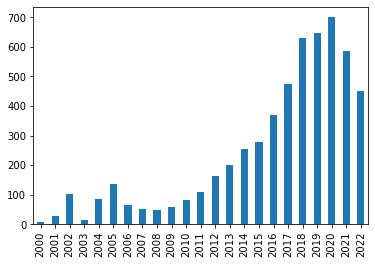

In [29]:
#Creating a bar chart that displays the movies/shows released each year from 2000 to 2022 
    #in ascending order of years
releases_per_year_2000s.plot(kind='bar')

As seen from the above visualization, starting 2011, number of movies have been increasing drastically. Which means that the library is more focused on movies released starting 2011

Visualization of the releases per each year from 2000 to 2022 in Ascending Order

<AxesSubplot:>

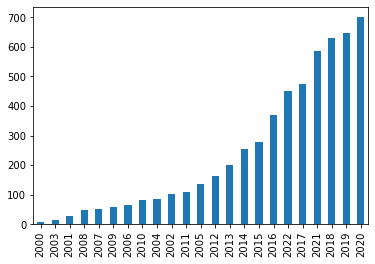

In [30]:
#Creating a bar chart that displays the movies/shows released each year from 2000 to 2022 
    #in ascending order of the number of releases
releases_per_year_2000s[:].sort_values(ascending= True).plot(kind='bar') 

As seen from the above visualization, the year 2020 has the highest number of movies and shows released which were 700 movies and the year 2000 has the lowest number of movie released which are only 9 movies

----------------------------------------------------------------------------------------------------------------------

# Genre with the highest rating

In this question I will be checking the genres' popularity and what's the genre of the movies that received high ratings

Checking and displaying the most common genres among the netflix library

In [31]:
#Counting the number of shows/movies per each genre
print("Number of Movies/Shows per each Genre:")
df['genre'].value_counts() 

Number of Movies/Shows per each Genre:


Animation, Action, Adventure    450
Comedy                          426
Drama                           221
Documentary                     204
Crime, Drama, Mystery           184
                               ... 
Action, Fantasy, Thriller         1
Action, Comedy, War               1
Film-Noir, Thriller               1
Documentary, Comedy, Music        1
Action, Adventure, Western        1
Name: genre, Length: 455, dtype: int64

In [32]:
# Counting the 10 most common genres in the dataset
most_common_genres = df['genre'].value_counts()[:10].sort_values(ascending=False) 

print(f"The 10 most common Genres: \n{most_common_genres}")

The 10 most common Genres: 
Animation, Action, Adventure    450
Comedy                          426
Drama                           221
Documentary                     204
Crime, Drama, Mystery           184
Comedy, Drama                   180
Action, Crime, Drama            138
Comedy, Drama, Romance          124
Drama, Romance                  122
Animation, Adventure, Comedy    119
Name: genre, dtype: int64


<AxesSubplot:>

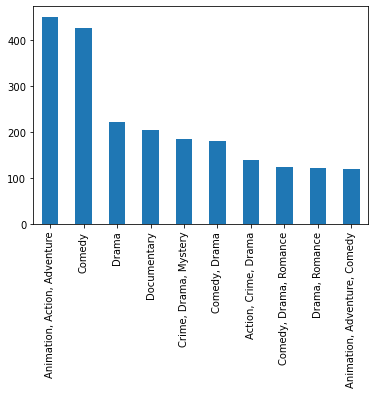

In [33]:
#Displaying a barchart of the 10 most common genres
most_common_genres.plot(kind='bar') 

As seen from the visualization above "Animation, Action, Adventure" (450 Movies/Shows) is the most common genre in the netflix library closely followed by "Comedy" (426 Movies/Shows)

In [34]:
#The genres of the top 10 rated movies/shows
top_10_genre = top_10_rated['genre'].value_counts() 
top_10_genre

Animation, Action, Adventure    4
Crime, Drama, Mystery           2
Crime, Drama, Thriller          1
Drama, Fantasy, Horror          1
Drama, Family                   1
Animation, Comedy, Drama        1
Name: genre, dtype: int64

Genres of the Top 10 rated Movies/Shows on Netflix


<AxesSubplot:>

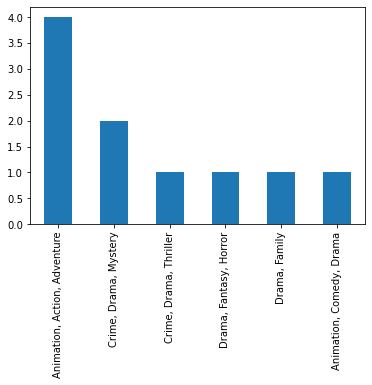

In [35]:
#Displaying a barchart of the genres of the Top 10 Movies
print("Genres of the Top 10 rated Movies/Shows on Netflix")
top_10_genre.plot(kind='bar') 

As seen from the above visualization again "Animation, Action, Adventure" is the genre with the highest rated movies, however unlike in terms of which is most common its followed by "Crime, Drama, Mystery" which indicates that more movies of the genre "Crime, Drama, Mystery" should be produced or added by Netflix. Also for the rest of the genres of the top 10 movies they are not even in the 10 most common genres which can also lead to the sugesstion of producing or adding movies of this genre as they are the most liked.

In [36]:
#Displaying show with the highest rating
top_show = top_10_rated.loc[top_10_rated["rating"] == top_10_rated["rating"].max()]
top_show

,title,release_year,description,genre,cast,rating
0,BoJack Horseman,2014,BoJack reconnects with faces from his past.,"Animation, Comedy, Drama","['Amy Winfrey', '| ', ' Stars:', 'Will Arne...",9.9


In [37]:
print(f"The Genre of the highest rated show is:  \n{top_show.genre}")

The Genre of the highest rated show is:  
0    Animation, Comedy, Drama
Name: genre, dtype: object


As seen, "Animation, Action and Adventure" is the most common genre among all movies/shows, the most popular among the top 10 rated movies and it's the genre of the top rated movie

-------------------------------------------------------------------------------------------------------------------------

# Content-based Recommendations

- The following section contains recommendations based on the movie's Description, Genre or Cast.
- To get the recommendations, the follwoing steps were implemented:
    - Convert the data to a matrix of TF-IDF features in order to be able to conduct cosine similarity. 
    - Apply Cosine Similarity to the TF-IDF matrix to measure the similarity between the input movie and all other records.
    - A class for each type of recommendation was created in which 
        - A function to return the top 10 similar movies to input is implemented
    

In [38]:
# Initialize a TFIDF object that will be used for the recommendations
vec = TfidfVectorizer()

# Recommend 10 Movies similar to input in terms of Description

In  this question I will be taking an input (Movie Name) and compare the description of this movie to all the dataset and identify 10 most similar movies to the description of this movie name.

Comparing the movie to all the dataset through cosine similarity

In [39]:
#Fit the TFIDF to the 'description' data to create a TFIDF representation
desc_tfidf=vec.fit_transform(df['description']).toarray()

#Compute the cosine similarities between all descriptions in the dataset
desc_similarity = cosine_similarity(desc_tfidf)

Recommending 10 most similar movies

In [40]:
#Recommendation based on Description class
class desc_recommender:
    
    #Function to compute 10 most similar movies according to description
    def desc_similar_10_movies(self,movie):
      
      #Index of the input movie
      movie_index=df[df['title']==movie].index[0] 
    
      #Returning and Sorting 10 most similar movies to the input movie in terms of description
      desc_similar_movies=sorted(enumerate(desc_similarity[movie_index]),reverse=True,key=lambda x :x[1])[1:11]

      c=0  
      for i in desc_similar_movies:
        similar_movies=df.iloc[i[0]] 
        if len(similar_movies)>0:
            c=c+1
            print(c,")" ,similar_movies[0])                

Displaying the top 10 similar movies

In [41]:
recom_1 = desc_recommender()
print("10 Recommended Movies/Shows with a similar plot as The Crown: ")
recom_1.desc_similar_10_movies('The Crown')

10 Recommended Movies/Shows with a similar plot as The Crown: 
1 ) The Crown
2 ) Downton Abbey
3 ) Kevin Hart: Don't F**k This Up
4 ) Chasing Trane: The John Coltrane Documentary
5 ) Reign
6 ) When They Cry
7 ) 7 Days Out
8 ) The Tudors
9 ) What's Wrong with Secretary Kim
10 ) Rebellion


Displaying the top 10 similar movies

In [42]:
recom_2 = desc_recommender()
print("10 Recommended Movies/Shows with a similar plot as How I met you Mother: ")
recom_2.desc_similar_10_movies("How I Met Your Mother")

10 Recommended Movies/Shows with a similar plot as How I met you Mother: 
1 ) Hope Gap
2 ) Dogs
3 ) Richie Rich
4 ) Theo Von: Regular People
5 ) Historia de un clan
6 ) The Land Before Time XIV: Journey of the Brave
7 ) Neumatt
8 ) Vinland Saga
9 ) Avatar: The Last Airbender
10 ) Stranger Things


-------------------------------------------------------------------------------------------------------------------------

# Recommend 10 Movies similar to input in terms of Genre

In  this question I will be taking an input (Movie Name) and compare the genre of this movie to all the dataset and identify 10 most similar movies with the same or close genre to this movie name.

Comparing the movie to all the dataset through cosine similarity

In [43]:
#Fit the TFIDF to the 'genre' data to create a TFIDF representation
genre_tfidf=vec.fit_transform(df['genre']).toarray()

#Compute the cosine similarities between all genres in the dataset
genre_similarity=cosine_similarity(genre_tfidf)

Recommending 10 most similar movies

In [44]:
#Recommendation based on genre Class
class genre_recommender:
    
    #Function to compute 10 most similar movies according to genre
    def genre_similar_10_movies(self,movie):
         
      movie_index=df[df['title']==movie].index[0]
    
      #Returning and Sorting 10 most similar movies to the input movie in terms of genre  
      genre_similar_movies=sorted(enumerate(genre_similarity[movie_index]),reverse=True,key=lambda x :x[1])[1:11]

      c=0  
      for i in genre_similar_movies:
          similar_movies=df.iloc[i[0]] 
          if len(similar_movies)>0:
              c=c+1
              print(c,")" ,similar_movies[0])
                

Displaying the top 10 similar movies

In [45]:
#Instinitating an instance from class genre_recommender()
recom_3 = genre_recommender()

print("10 Recommended Movies/Shows with similar genre to The Crown: ")

#Calling the method genre_similar_10_movies on the movie
recom_3.genre_similar_10_movies("The Crown")

10 Recommended Movies/Shows with similar genre to The Crown: 
1 ) The Crown
2 ) Luis Miguel: The Series
3 ) Medici
4 ) Versailles
5 ) Borgia
6 ) A Man for All Seasons
7 ) Malcolm X
8 ) Nise: The Heart of Madness
9 ) The Boy Who Harnessed the Wind
10 ) Self Made: Inspired by the Life of Madam C.J. Walker


Displaying the top 10 similar movies

In [46]:
#Instinitating an instance from class genre_recommender()
recom_4 = genre_recommender()

print("10 Recommended Movies/Shows with similar genre to How I met you Mother: ")

#Calling the method genre_similar_10_movies on the movie
recom_4.genre_similar_10_movies("How I Met Your Mother")

10 Recommended Movies/Shows with similar genre to How I met you Mother: 
1 ) Friends
2 ) Hometown Cha-Cha-Cha
3 ) How I Met Your Mother
4 ) Little Things
5 ) Put Your Head on My Shoulder
6 ) Fated to Love You
7 ) New Girl
8 ) Good Morning Call
9 ) Will & Grace
10 ) Love Per Square Foot


-------------------------------------------------------------------------------------------------------------------------

# Recommend 10 Movies with similar Cast to the input

In  this question I will be taking an input (Movie Name) and compare the cast of this movie to all the dataset and identify 10 most similar movies with the same cast or some of the cast members of this movie name.

Comparing the movie to all the dataset through cosine similarity

In [47]:
#Fit the TFIDF to the 'cast' data to create a TFIDF representation
cast_tfidf=vec.fit_transform(df['cast']).toarray()

#Compute the cosine similarities between all cast info in the dataset
cast_similarity = cosine_similarity(cast_tfidf)

Recommending 10 most similar movies

In [48]:
#Recommendation based on cast Class
class cast_recommender:
    
    #Function to compute 10 most similar movies according to genre
    def cast_similar_10_movies(self,movie):
         
      movie_index=df[df['title']==movie].index[0]
    
      #Returning and Sorting 10 most similar movies to the input movie in terms of movie cast  
      cast_similar_movies=sorted(enumerate(cast_similarity[movie_index]),reverse=True,key=lambda x :x[1])[1:11]

      c=0  
      for i in cast_similar_movies:
          similar_movies=df.iloc[i[0]] 
          if len(similar_movies)>0:
              c=c+1
              print(c,")" ,similar_movies[0])
                

Displaying the top 10 similar movies

In [49]:
#Instinitating an instance from class cast_recommender()
recom_5 = cast_recommender()

print("10 Recommended Movies/Shows with similar cast to The Crown: ")

#Calling the method cast_similar_10_movies on the movie
recom_5.cast_similar_10_movies('The Crown')

10 Recommended Movies/Shows with similar cast to The Crown: 
1 ) The Crown
2 ) Locke
3 ) Broadchurch
4 ) The 69th Primetime Emmy Awards
5 ) Flowers
6 ) The Lost Daughter
7 ) The Girl in the Spider's Web
8 ) First Match
9 ) America: The Motion Picture
10 ) Eli


Displaying the top 10 similar movies

In [50]:
#Instinitating an instance from class cast_recommender()
recom_6= cast_recommender()

print("10 Recommended Movies/Shows with similar cast as How I met your Mother")

#Calling the method cast_similar_10_movies on the movie
recom_6.cast_similar_10_movies("How I Met Your Mother")

10 Recommended Movies/Shows with similar cast as How I met your Mother
1 ) A Series of Unfortunate Events
2 ) Friends from College
3 ) Results
4 ) Still Laugh-In: The Stars Celebrate
5 ) Gone Girl
6 ) Uncoupled
7 ) Cloudy with a Chance of Meatballs 2
8 ) The Discovery
9 ) Windfall
10 ) Bad Teacher


-------------------------------------------------------------------------------------------------------------------------

# Conclusion




Based on the previous analysis we can conclude that:
- Majority of the top 10 rated movies were of the genre "Animation, Action, Adventure" so Netflix can add or even produce movies of this genre since its the highest rated.

- The genre "Crime, Drama, Mystery" was also one of the genre with highest rated movies however its not in the 10 most common genres so more movies of this genre should be added to the library or produced.

- There are very few 90s movies so more of them can be added to the library which can also attract more audience (Those interested in the 90s movies).

- In my opnion the most accurate content-based recommender is the one based on the genre rather than the description.
  For future recommendation NLP can be implemented to produce more accurate results for the description-based recommender.
  
- For future analysis the dataset could be splitte into Movies and TV shows for more elaborate analysis.
 